In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [11]:
df = pd.read_csv("../data/processed/zerodha_kite_reviews_with_topics.csv")
df["review_date"] = pd.to_datetime(df["review_date"])

df.head()


,reviewId,userName,rating,review_text,review_date,thumbsUpCount,reviewCreatedVersion,clean_text,dominant_topic
0,6f8f3b4c-35d2-4341-9643-db463224271c,Sujay Roy,5,very easy to use,2025-12-12 12:13:27,0,3.9.1,easy use,2
1,cb99c260-3937-42bd-a6f1-af4091f75681,Andy Singh,4,watchlist 7 se baadhao 10 se 15 karo kyuki zer...,2025-12-12 11:53:12,0,NaN,watchlist baadhao karo kyuki zerodha sirf char...,3
2,e63d683c-fbd6-443f-b043-e1f3817c329a,VARUN KUMAR,1,I am unable to install this app in my mobile,2025-12-12 10:33:28,0,NaN,unable install app mobile,3
3,e433065f-ccb0-492e-8d72-550e25e36fdb,rahul kumar,1,give option to type price directly instead of ...,2025-12-12 09:56:28,0,3.10.1,give option type price directly instead calcul...,3
4,92329f60-ac5d-4294-99e5-fc8b017d32b7,Ramchandra Chobe,3,New update - charts are updating. not a good u...,2025-12-12 06:24:09,0,NaN,new update charts updating not good update,3


In [12]:
analyzer = SentimentIntensityAnalyzer()

df["sentiment_score"] = df["clean_text"].apply(
    lambda x: analyzer.polarity_scores(str(x))["compound"]
)


In [13]:
df["sentiment_score"].describe()


count    2271.000000
mean        0.297118
std         0.464988
min        -0.997800
25%         0.000000
50%         0.440400
75%         0.636900
max         0.991400
Name: sentiment_score, dtype: float64

In [14]:
monthly_topic_sentiment = (
    df.set_index("review_date")
      .groupby("dominant_topic")
      .resample("ME")["sentiment_score"]
      .mean()
      .unstack(0)
)

monthly_topic_sentiment.head()


dominant_topic,0,1,2,3,4,5
review_date,,,,,,
2025-08-31,0.259590,0.495812,0.457288,0.438131,0.398847,0.180325
2025-09-30,0.090649,0.460099,0.492300,0.315364,0.304599,0.187031
2025-10-31,0.080556,0.417376,0.483545,0.315591,0.319567,0.340141
2025-11-30,0.243330,0.539857,0.462415,0.298140,0.356763,0.432821
2025-12-31,0.084596,0.434341,0.423589,0.304459,0.213980,0.340023


In [15]:
topic_labels = {
    0: "General App Satisfaction",
    1: "Platform Reliability & Trust",
    2: "Customer Support & Accessibility",
    3: "Feature Requests & Interface Overload",
    4: "Core User Experience & Usability",
    5: "Minor UI Feedback & Responsiveness"
}

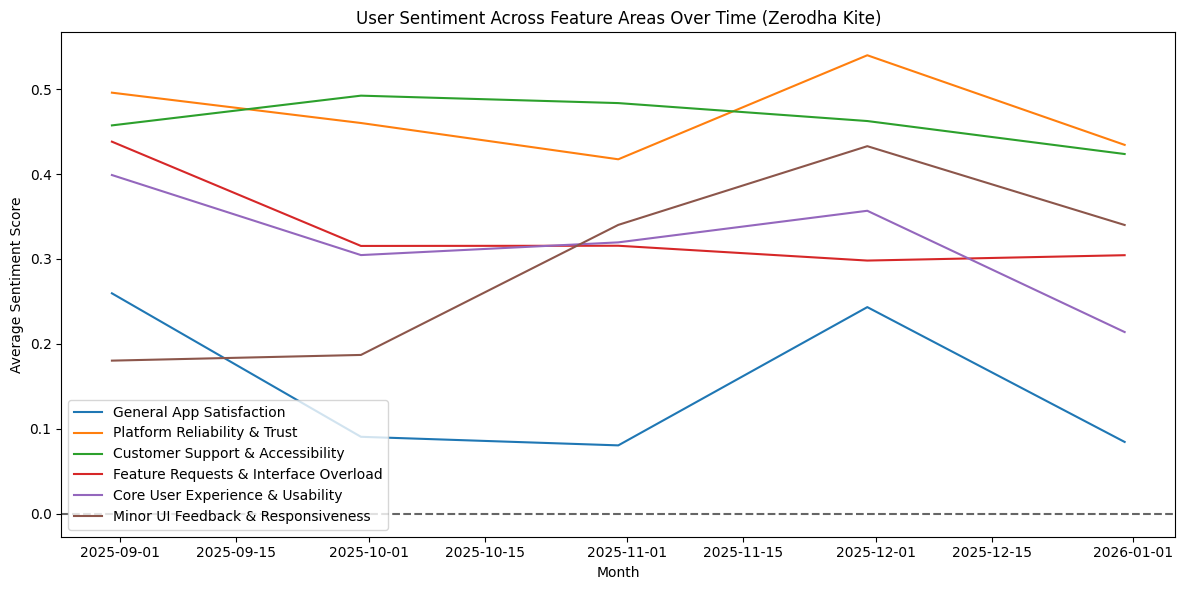

In [16]:
plt.figure(figsize=(12, 6))
for topic in monthly_topic_sentiment.columns:
    plt.plot(
        monthly_topic_sentiment.index,
        monthly_topic_sentiment[topic],
        label=topic_labels[topic]
    )
plt.axhline(0, color="black", linestyle="--", alpha=0.6)
plt.title("User Sentiment Across Feature Areas Over Time (Zerodha Kite)")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.legend()
plt.tight_layout()
plt.savefig(
    "../visuals/sentiment_trend_by_topic.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

In [17]:
monthly_topic_sentiment.to_csv(
    "../data/processed/zerodha_kite_monthly_topic_sentiment.csv"
)